In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


618

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | tonantins
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | broome
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | paamiut
Processing Record 9 of Set 1 | monrovia
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | fairbanks
Processing Record 15 of Set 1 | klaksvik
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | muzhi
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | ribeira grande
Processing Record 22 of Set 1 | saleaula
City no

Processing Record 37 of Set 4 | baykit
Processing Record 38 of Set 4 | san juan
Processing Record 39 of Set 4 | karamay
City not found. Skipping...
Processing Record 40 of Set 4 | anadyr
Processing Record 41 of Set 4 | poya
Processing Record 42 of Set 4 | mount gambier
Processing Record 43 of Set 4 | belogorsk
Processing Record 44 of Set 4 | labuhan
Processing Record 45 of Set 4 | dakoro
Processing Record 46 of Set 4 | solnechnyy
Processing Record 47 of Set 4 | chapais
Processing Record 48 of Set 4 | aleysk
Processing Record 49 of Set 4 | north platte
Processing Record 50 of Set 4 | port elizabeth
Processing Record 1 of Set 5 | novi pazar
Processing Record 2 of Set 5 | port macquarie
Processing Record 3 of Set 5 | pokhara
Processing Record 4 of Set 5 | ahipara
Processing Record 5 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 5 | yeppoon
Processing Record 7 of Set 5 | lake city
Processing Record 8 of Set 5 | el wasta
City not found. Skipping...
Processing

Processing Record 25 of Set 8 | cuamba
Processing Record 26 of Set 8 | kedougou
Processing Record 27 of Set 8 | shalakusha
Processing Record 28 of Set 8 | wlodawa
Processing Record 29 of Set 8 | safaqis
City not found. Skipping...
Processing Record 30 of Set 8 | staunton
Processing Record 31 of Set 8 | kara-tyube
Processing Record 32 of Set 8 | grand centre
City not found. Skipping...
Processing Record 33 of Set 8 | kpandu
Processing Record 34 of Set 8 | beyneu
Processing Record 35 of Set 8 | daru
Processing Record 36 of Set 8 | puerto madryn
Processing Record 37 of Set 8 | mountain home
Processing Record 38 of Set 8 | hobyo
Processing Record 39 of Set 8 | panguipulli
Processing Record 40 of Set 8 | zhezkazgan
Processing Record 41 of Set 8 | samusu
City not found. Skipping...
Processing Record 42 of Set 8 | ashford
Processing Record 43 of Set 8 | pevek
Processing Record 44 of Set 8 | harper
Processing Record 45 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 46 of Set

Processing Record 6 of Set 12 | noumea
Processing Record 7 of Set 12 | erenhot
Processing Record 8 of Set 12 | sedelnikovo
City not found. Skipping...
Processing Record 9 of Set 12 | daan
Processing Record 10 of Set 12 | shemordan
Processing Record 11 of Set 12 | bicas
Processing Record 12 of Set 12 | ibiapina
Processing Record 13 of Set 12 | meadow lake
Processing Record 14 of Set 12 | biloela
Processing Record 15 of Set 12 | chupa
Processing Record 16 of Set 12 | bay saint louis
Processing Record 17 of Set 12 | linxia
Processing Record 18 of Set 12 | mildura
Processing Record 19 of Set 12 | fuyang
Processing Record 20 of Set 12 | xai-xai
Processing Record 21 of Set 12 | chlumec nad cidlinou
Processing Record 22 of Set 12 | dezful
Processing Record 23 of Set 12 | along
Processing Record 24 of Set 12 | belaya gora
Processing Record 25 of Set 12 | tateyama
Processing Record 26 of Set 12 | vardo
Processing Record 27 of Set 12 | longyearbyen
Processing Record 28 of Set 12 | ampanihy
Proce

In [12]:
# Tally the number of cities in the city_data array to ensure over 500
len(city_data)

551

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.8794,147.3294,83.23,59,20,1.01,AU,2022-01-31 01:49:01
1,Tonantins,-2.8731,-67.8022,74.05,95,100,3.13,BR,2022-01-31 01:49:02
2,Rikitea,-23.1203,-134.9692,77.29,64,100,5.39,PF,2022-01-31 01:48:59
3,Busselton,-33.6500,115.3333,73.04,44,99,17.45,AU,2022-01-31 01:49:02
4,Avarua,-21.2078,-159.7750,77.05,83,100,5.75,CK,2022-01-31 01:49:02
5,Broome,42.2506,-75.8330,11.01,79,34,4.00,US,2022-01-31 01:49:03
6,Hermanus,-34.4187,19.2345,72.81,82,100,13.87,ZA,2022-01-31 01:48:55
7,Paamiut,61.9940,-49.6678,22.10,94,100,9.82,GL,2022-01-31 01:49:03
8,Monrovia,6.3005,-10.7969,78.80,86,9,2.95,LR,2022-01-31 01:49:03
9,Kaitangata,-46.2817,169.8464,68.94,72,62,5.99,NZ,2022-01-31 01:45:12


In [14]:
#Reorder Columns in city_data dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hobart,AU,2022-01-31 01:49:01,-42.8794,147.3294,83.23,59,20,1.01
1,Tonantins,BR,2022-01-31 01:49:02,-2.8731,-67.8022,74.05,95,100,3.13
2,Rikitea,PF,2022-01-31 01:48:59,-23.1203,-134.9692,77.29,64,100,5.39
3,Busselton,AU,2022-01-31 01:49:02,-33.6500,115.3333,73.04,44,99,17.45
4,Avarua,CK,2022-01-31 01:49:02,-21.2078,-159.7750,77.05,83,100,5.75
5,Broome,US,2022-01-31 01:49:03,42.2506,-75.8330,11.01,79,34,4.00
6,Hermanus,ZA,2022-01-31 01:48:55,-34.4187,19.2345,72.81,82,100,13.87
7,Paamiut,GL,2022-01-31 01:49:03,61.9940,-49.6678,22.10,94,100,9.82
8,Monrovia,LR,2022-01-31 01:49:03,6.3005,-10.7969,78.80,86,9,2.95
9,Kaitangata,NZ,2022-01-31 01:45:12,-46.2817,169.8464,68.94,72,62,5.99


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

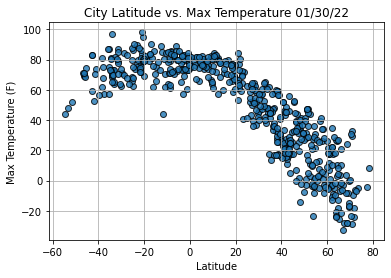

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

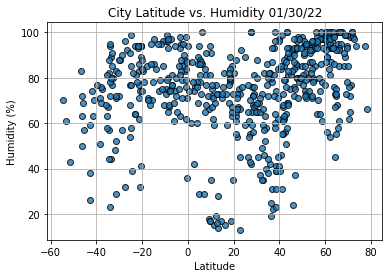

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

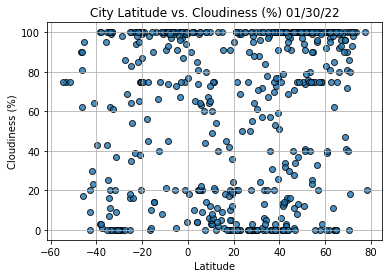

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

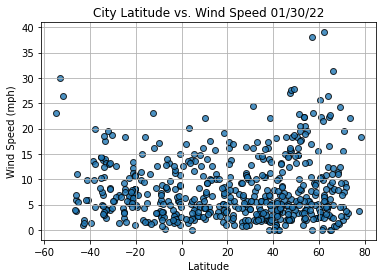

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()